In [53]:
import pandas as pd
import seaborn as sns; sns.set()
from matplotlib import pyplot as plt
from pandas.plotting import register_matplotlib_converters
import os
register_matplotlib_converters()

%matplotlib inline

In [74]:
def clean_df(df, column_name):
    not_well_formatted = []
    for i, row in enumerate(df[column_name]):
        try:
            float(row)
        except:
            not_well_formatted.append(i)
    df = df.drop(not_well_formatted)
    df = df.astype({column_name: 'float32'})
    df["datetime"] = pd.to_datetime(df["Date"])
    return df
def open_df_by_ind(industry, column_name):
    index = list(pd.date_range(start="2019-11-12",end="2020-04-03"))
    def_df = pd.DataFrame.from_dict({"datetime":index})
    def_df["datetime"] = pd.to_datetime(def_df["datetime"], unit="D")
    list_dir = os.listdir("results")
    ind_fname = [fname for fname in list_dir if industry.lower() in fname]
    all_data = {}
    for path in ind_fname:
        symbol = path.lower().replace(industry.lower(), "").replace(".csv", "").replace("_", "").upper()
        df = pd.read_csv(os.path.join("results", path), nrows=100)
        df = clean_df(df, column_name)
#         print({column_name:column_name.upper().replace("*", "")+"_"+symbol})
        df = df.rename(columns={column_name:column_name.upper().replace("*", "")+"_"+symbol})
        df = df[["datetime", column_name.upper().replace("*", "")+"_"+symbol]]
        def_df = pd.merge(def_df, df, on='datetime')

    return def_df

In [75]:
all_df = open_df_by_ind("Healthcare", "Close*")

In [76]:
all_df

,datetime,CLOSE_ABT,CLOSE_NVO,CLOSE_PFE,CLOSE_TMO,CLOSE_DHR,CLOSE_AMGN,CLOSE_JNJ,CLOSE_LLY,CLOSE_BDX,...,CLOSE_GILD,CLOSE_AGN,CLOSE_CVS,CLOSE_VRTX,CLOSE_NVS,CLOSE_MRK,CLOSE_CI,CLOSE_AZN,CLOSE_MDT,CLOSE_DHR-PA
0,2019-11-13,84.220001,57.639999,36.599998,300.019989,137.050003,219.669998,131.270004,112.790001,247.009995,...,63.330002,181.600006,72.820000,207.100006,89.860001,84.820000,190.250000,47.820000,109.010002,1101.719971
1,2019-11-14,84.120003,57.889999,36.549999,300.839996,136.149994,218.500000,130.960007,111.389999,248.800003,...,63.810001,182.470001,72.940002,205.000000,89.510002,84.550003,189.699997,47.369999,109.209999,1091.839966
2,2019-11-15,85.709999,57.279999,37.279999,306.809998,142.990005,220.860001,134.940002,113.190002,248.300003,...,65.070000,183.610001,74.290001,209.800003,90.040001,84.900002,196.009995,47.439999,112.059998,1126.959961
3,2019-11-18,84.260002,57.070000,37.220001,300.989990,140.229996,220.669998,134.830002,114.070000,243.509995,...,64.290001,184.500000,75.099998,210.000000,90.330002,84.129997,198.380005,47.939999,111.250000,1110.439941
4,2019-11-19,84.290001,57.040001,37.660000,306.420013,143.600006,224.500000,134.820007,115.099998,245.779999,...,65.000000,185.220001,75.349998,215.000000,90.400002,84.650002,200.020004,47.669998,111.070000,1127.689941
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
93,2020-03-30,79.339996,60.180000,32.669998,284.959991,140.820007,208.479996,133.009995,138.440002,222.869995,...,75.930000,176.309998,59.680000,231.919998,81.900002,76.949997,178.259995,44.529999,92.050003,1075.459961
94,2020-03-31,78.910004,60.200001,32.639999,283.600006,138.410004,202.729996,131.130005,138.720001,229.770004,...,74.760002,177.100006,59.330002,237.949997,82.449997,76.940002,177.179993,44.660000,90.180000,1033.150024
95,2020-04-01,76.570000,59.750000,31.750000,275.200012,128.699997,197.809998,128.809998,136.419998,225.399994,...,72.510002,174.899994,58.340000,225.479996,80.930000,73.800003,173.070007,43.779999,84.110001,1003.150024
96,2020-04-02,79.440002,59.310001,32.869999,287.549988,136.429993,208.880005,133.149994,142.179993,233.279999,...,76.980003,177.539993,55.410000,242.160004,83.599998,76.870003,168.809998,43.759998,86.150002,1026.829956


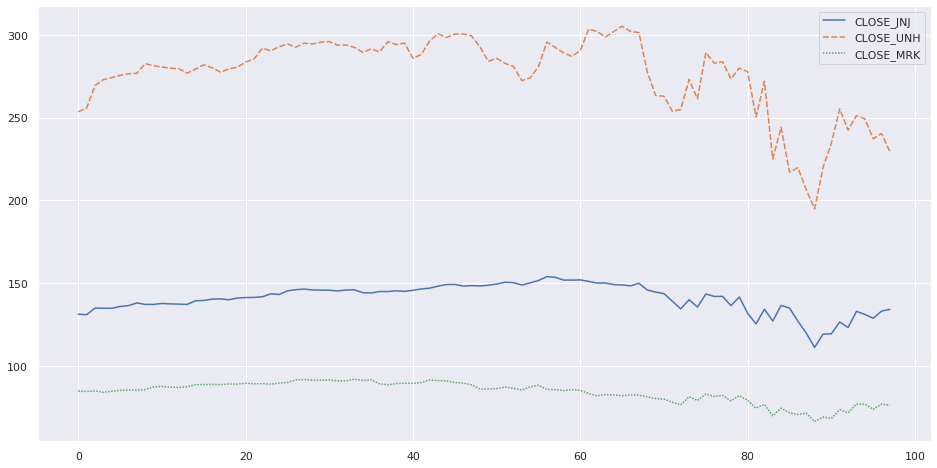

In [77]:
df_plot = all_df[["CLOSE_JNJ","CLOSE_UNH","CLOSE_MRK"]]
fig, ax = plt.subplots(figsize=(16, 8))
sns.lineplot(ax=ax, data=df_plot)

## sum by column each industry

In [78]:
all_df["sum"] = all_df.sum(axis=1)

In [79]:
all_df

,datetime,CLOSE_ABT,CLOSE_NVO,CLOSE_PFE,CLOSE_TMO,CLOSE_DHR,CLOSE_AMGN,CLOSE_JNJ,CLOSE_LLY,CLOSE_BDX,...,CLOSE_AGN,CLOSE_CVS,CLOSE_VRTX,CLOSE_NVS,CLOSE_MRK,CLOSE_CI,CLOSE_AZN,CLOSE_MDT,CLOSE_DHR-PA,sum
0,2019-11-13,84.220001,57.639999,36.599998,300.019989,137.050003,219.669998,131.270004,112.790001,247.009995,...,181.600006,72.820000,207.100006,89.860001,84.820000,190.250000,47.820000,109.010002,1101.719971,4165.629883
1,2019-11-14,84.120003,57.889999,36.549999,300.839996,136.149994,218.500000,130.960007,111.389999,248.800003,...,182.470001,72.940002,205.000000,89.510002,84.550003,189.699997,47.369999,109.209999,1091.839966,4155.600098
2,2019-11-15,85.709999,57.279999,37.279999,306.809998,142.990005,220.860001,134.940002,113.190002,248.300003,...,183.610001,74.290001,209.800003,90.040001,84.900002,196.009995,47.439999,112.059998,1126.959961,4250.609863
3,2019-11-18,84.260002,57.070000,37.220001,300.989990,140.229996,220.669998,134.830002,114.070000,243.509995,...,184.500000,75.099998,210.000000,90.330002,84.129997,198.380005,47.939999,111.250000,1110.439941,4224.620117
4,2019-11-19,84.290001,57.040001,37.660000,306.420013,143.600006,224.500000,134.820007,115.099998,245.779999,...,185.220001,75.349998,215.000000,90.400002,84.650002,200.020004,47.669998,111.070000,1127.689941,4268.850098
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
93,2020-03-30,79.339996,60.180000,32.669998,284.959991,140.820007,208.479996,133.009995,138.440002,222.869995,...,176.309998,59.680000,231.919998,81.900002,76.949997,178.259995,44.529999,92.050003,1075.459961,4019.919922
94,2020-03-31,78.910004,60.200001,32.639999,283.600006,138.410004,202.729996,131.130005,138.720001,229.770004,...,177.100006,59.330002,237.949997,82.449997,76.940002,177.179993,44.660000,90.180000,1033.150024,3979.219727
95,2020-04-01,76.570000,59.750000,31.750000,275.200012,128.699997,197.809998,128.809998,136.419998,225.399994,...,174.899994,58.340000,225.479996,80.930000,73.800003,173.070007,43.779999,84.110001,1003.150024,3840.839844
96,2020-04-02,79.440002,59.310001,32.869999,287.549988,136.429993,208.880005,133.149994,142.179993,233.279999,...,177.539993,55.410000,242.160004,83.599998,76.870003,168.809998,43.759998,86.150002,1026.829956,3952.770020


In [80]:
industry_cat = set(["_".join(fname.replace(".csv", "").split("_")[:-1]) for fname in os.listdir("results")])

In [81]:
industry_cat

{'basic_materials',
 'communication_services',
 'consumer_cyclical',
 'consumer_defensive',
 'energy',
 'financial_services',
 'healthcare',
 'industrials',
 'real_estate',
 'technology',
 'utilities'}

In [82]:
sum_each_industry = {}
index = list(pd.date_range(start="2019-11-12",end="2020-04-03"))
def_df_ind = pd.DataFrame.from_dict({"datetime":index})
def_df_ind["datetime"] = pd.to_datetime(def_df_ind["datetime"], unit="D")
for ind in industry_cat:
    df = open_df_by_ind(ind, "Close*")
    df["sum_"+ind] = df.sum(axis=1)
    df = df[["datetime", "sum_"+ind]]
    def_df_ind = pd.merge(def_df_ind, df, on='datetime')
def_df_ind["datetime"] = def_df_ind["datetime"].values.astype(float)

In [83]:
def_df_ind

,datetime,sum_consumer_cyclical,sum_consumer_defensive,sum_financial_services,sum_communication_services,sum_industrials,sum_real_estate,sum_utilities,sum_healthcare,sum_basic_materials,sum_energy,sum_technology
0,1.576109e+18,7140.200195,2377.129883,342750.93750,4937.299805,4312.399902,3276.449951,2239.839844,4406.729980,2517.679688,1259.630005,4097.100098
1,1.576195e+18,7151.149414,2386.030029,342041.25000,4935.209961,4318.369629,3302.510010,2260.479980,4403.770020,2506.480225,1252.600098,4132.089844
2,1.576454e+18,7231.250000,2397.199951,344343.53125,4980.110352,4317.850098,3332.189941,2284.949951,4440.330078,2522.149902,1267.800049,4179.500000
3,1.576541e+18,7266.959961,2390.000000,342963.34375,4978.720215,4318.859863,3305.560059,2287.739990,4435.669922,2521.409912,1276.609985,4160.969727
4,1.576627e+18,7261.420410,2391.489990,341463.56250,4980.770020,4293.899902,3335.560303,2297.539795,4447.740234,2511.959961,1284.709961,4176.500000
...,...,...,...,...,...,...,...,...,...,...,...,...
72,1.585267e+18,6169.100098,2020.709961,271527.09375,4391.919922,3375.300293,3094.000000,2025.369873,3883.719727,1933.539917,718.100037,3726.000000
73,1.585526e+18,6315.360352,2077.560059,277483.18750,4518.640137,3426.920166,3208.979980,2079.969971,4019.919922,1995.619873,732.629944,3869.210205
74,1.585613e+18,6322.370117,2049.189941,275433.40625,4552.620117,3366.590088,3124.510010,1989.180054,3979.219727,1963.629883,756.750000,3796.340088
75,1.585699e+18,6040.289551,2018.930054,264513.46875,4378.739746,3243.500000,2963.339844,1882.140015,3840.839844,1876.229980,734.270020,3592.400146


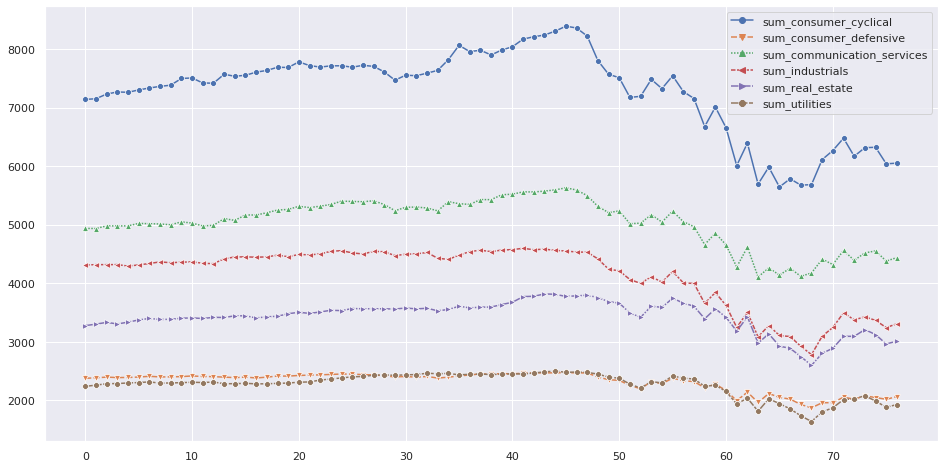

In [94]:
fig, ax = plt.subplots(figsize=(16, 8))
filled_markers = ('o', 'v', '^', '<', '>', '8', 's', 'p', '*', 'h', 'H', 'D', 'd', 'P', 'X')

selected_columns = ["sum_"+ind for ind in list(industry_cat)[:7]]
# selected_columns.append("datetime")
selected_columns.remove("sum_financial_services")

sns.lineplot(ax=ax, data=def_df_ind[selected_columns], markers=filled_markers)

In [95]:
selected_columns_all = ["sum_"+ind for ind in list(industry_cat)]
def_df_ind["sum_all"] = def_df_ind[selected_columns_all].sum(axis=1)

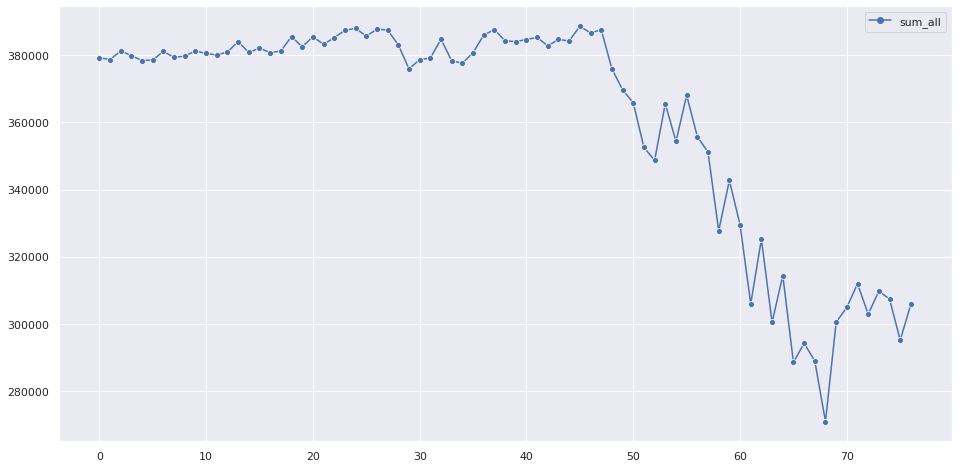

In [143]:
fig, ax = plt.subplots(figsize=(16, 8))
sns.lineplot(ax=ax, data=def_df_ind[["sum_all"]],markers="o")

In [138]:
difference = {}
for column in selected_columns_all:
    difference[column.replace("sum_", "").replace("_", " ").upper()] = (def_df_ind[column].iloc[-1]-def_df_ind[column].iloc[0])/def_df_ind[column].iloc[0]

In [139]:
difference_df = pd.DataFrame(difference, index=[0])

In [140]:
difference_df

,CONSUMER CYCLICAL,CONSUMER DEFENSIVE,FINANCIAL SERVICES,COMMUNICATION SERVICES,INDUSTRIALS,REAL ESTATE,UTILITIES,HEALTHCARE,BASIC MATERIALS,ENERGY,TECHNOLOGY
0,-0.152514,-0.131385,-0.198279,-0.100832,-0.23268,-0.080413,-0.138523,-0.103015,-0.233612,-0.36186,-0.118711


[Text(0, 0, 'ENERGY'),
 Text(0, 0, 'BASIC MATERIALS'),
 Text(0, 0, 'INDUSTRIALS'),
 Text(0, 0, 'FINANCIAL SERVICES'),
 Text(0, 0, 'CONSUMER CYCLICAL'),
 Text(0, 0, 'UTILITIES'),
 Text(0, 0, 'CONSUMER DEFENSIVE'),
 Text(0, 0, 'TECHNOLOGY'),
 Text(0, 0, 'HEALTHCARE'),
 Text(0, 0, 'COMMUNICATION SERVICES'),
 Text(0, 0, 'REAL ESTATE')]

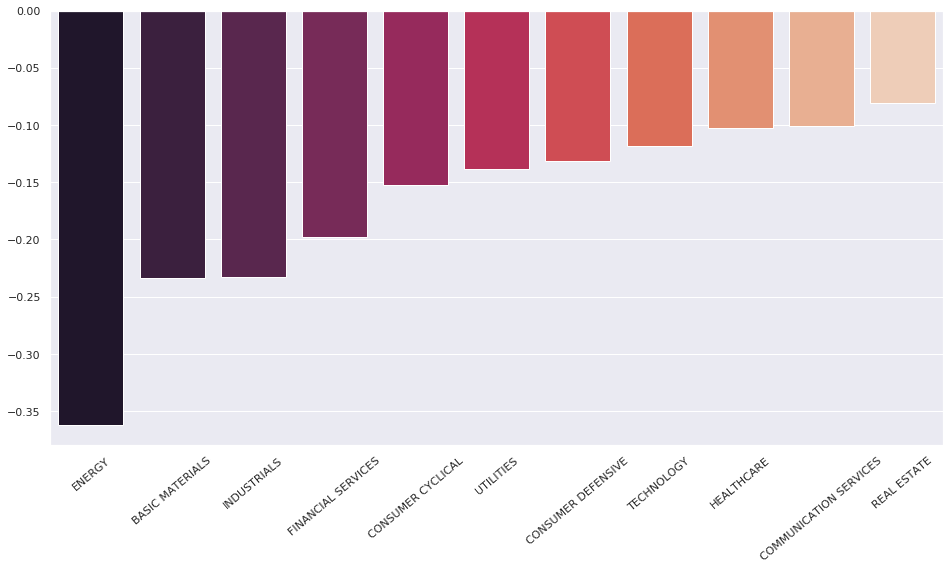

In [142]:
fig, ax = plt.subplots(figsize=(16, 8))
barplot = sns.barplot(ax=ax, data=difference_df.sort_values(0, axis=1), palette="rocket")
barplot.set_xticklabels(barplot.get_xticklabels(), rotation=40)